In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%load_ext line_profiler

ModuleNotFoundError: No module named 'line_profiler'

In [3]:
import json
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [4]:
from predict import Model
from predict import load_data
from utils import imsetshow


## 1.0 Configuration

In [13]:
config_file_path = "../config/config.json"
with open(config_file_path, "r") as read_file:
    config = json.load(read_file)
print(config)
print(config_file_path)
checkpoint_dir = config["paths"]["checkpoint_dir"]
run_subfolder = 'batch_8_views_32_min_32_beta_50.0_time_2021-12-10-20-32-43-747510'
checkpoint_filename = 'HRNet.pth'
checkpoint_file = os.path.join('..', checkpoint_dir, run_subfolder, checkpoint_filename)
# print(checkpoint_file)
assert os.path.isfile(checkpoint_file)

{'paths': {'prefix': 'data/', 'checkpoint_dir': 'models/weights', 'tb_log_file_dir': 'tb_logs/'}, 'network': {'encoder': {'in_channels': 2, 'num_layers': 2, 'kernel_size': 3, 'channel_size': 64}, 'recursive': {'alpha_residual': True, 'in_channels': 64, 'num_layers': 2, 'kernel_size': 3}, 'decoder': {'deconv': {'in_channels': 64, 'kernel_size': 3, 'stride': 3, 'out_channels': 64}, 'final': {'in_channels': 64, 'kernel_size': 1, 'out_channels': 1}}}, 'training': {'num_epochs': 5, 'batch_size': 8, 'min_L': 32, 'n_views': 32, 'n_workers': 4, 'crop': 3, 'lr': 0.0007, 'lr_step': 2, 'lr_decay': 0.97, 'load_lr_maps': False, 'beta': 50.0, 'create_patches': True, 'patch_size': 64, 'val_proportion': 0.1, 'lambda': 1e-06}}
../config/config.json


In [10]:
import os 
os.getcwd()
print(config_file_path)

../config/config.json


## 1.1 Load model

In [14]:
model = Model(config)
model.load_checkpoint(checkpoint_file=checkpoint_file)

## 1.2 Load data

In [31]:
train_dataset, val_dataset, test_dataset, baseline_cpsnrs = load_data(config_file_path, val_proportion=0.10, top_k=-1)

## 1.3 Run evaluation

In [32]:
results = model.evaluate(train_dataset, val_dataset, test_dataset, baseline_cpsnrs)

  0%|          | 0/1044 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

## 1.4 Benchmark % ESA Baseline

In [33]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
ESA,1450.0,4.637892e+01,3.779463,3.144905e+01,4.393971e+01,4.630870e+01,4.864591e+01,5.972002e+01
model,1160.0,4.686787e+01,3.388179,3.463594e+01,4.458926e+01,4.687292e+01,4.897487e+01,5.702843e+01
score,1160.0,9.915652e-01,0.027049,8.809147e-01,9.781735e-01,9.917376e-01,1.002856e+00,1.171008e+00
mean_clr,1450.0,3.882206e+06,190040.649017,2.340645e+06,3.815749e+06,3.916757e+06,4.009718e+06,4.158178e+06
std_clr,1450.0,3.742484e+05,115999.730132,4.393662e+04,3.036766e+05,3.845572e+05,4.557472e+05,1.046887e+06


In [34]:
results.loc[results['part'] == 'train'].describe().loc['mean']

ESA         4.655431e+01
model       4.691963e+01
score       9.918567e-01
mean_clr    3.875459e+06
std_clr     3.776238e+05
Name: mean, dtype: float64

In [35]:
results.loc[results['part'] == 'val'].describe().loc['mean']

ESA         4.590570e+01
model       4.640208e+01
score       9.889417e-01
mean_clr    3.883260e+06
std_clr     3.920604e+05
Name: mean, dtype: float64

In [36]:
results.loc[results['part'] == 'test'].describe().loc['mean']

ESA         4.593679e+01
model                NaN
score                NaN
mean_clr    3.906075e+06
std_clr     3.549721e+05
Name: mean, dtype: float64

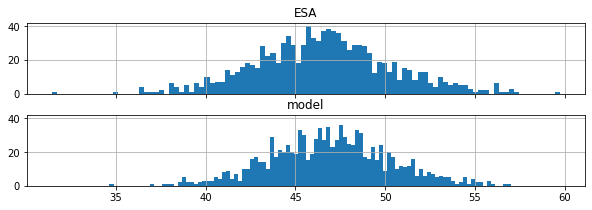

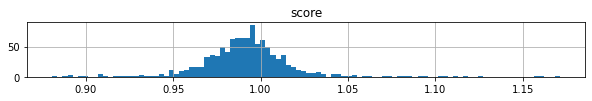

In [37]:
results.loc[results['part']=='train'].hist(column=['ESA', 'model'],
                                           sharex=True, sharey=True, bins=100, layout=(2,1), figsize=(10, 3));
results.loc[results['part']=='train'].hist(column=['score'],
                                           bins=100, figsize=(10, 1));

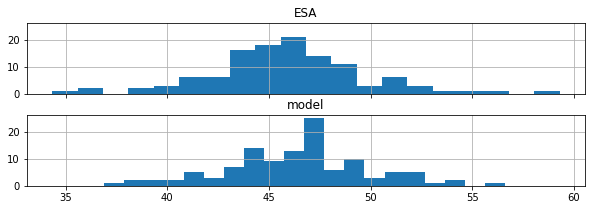

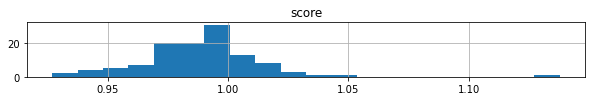

In [38]:
results.loc[results['part']=='val'].hist(column=['ESA', 'model'],
                                           sharex=True, sharey=True, bins=20, layout=(2,1), figsize=(10, 3));
results.loc[results['part']=='val'].hist(column=['score'],
                                           bins=20, figsize=(10, 1));

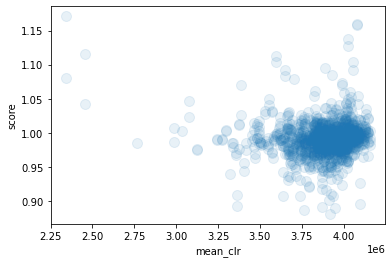

In [39]:
results.plot.scatter('mean_clr', 'score', s=100, alpha=.1);

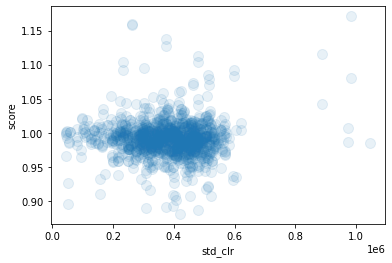

In [40]:
results.plot.scatter('std_clr', 'score', s=100, alpha=.1);

## 1.5 Pretty pics

In [41]:
results[results['part'] == 'val'].sort_values('score')

,ESA,model,clr,part,score,mean_clr,std_clr
imgset0939,48.108972,51.901184,"[4137885, 4135335, 4125390, 4117230, 4096320, ...",val,0.926934,3.871234e+06,399642.297542
imgset0644,34.340701,36.869564,"[4162110, 4149360, 4138395, 4133040, 4130745, ...",val,0.931411,3.736410e+06,459739.213577
imgset1114,36.290002,38.692802,"[4172820, 4171035, 4167210, 4164150, 4163130, ...",val,0.937901,3.964258e+06,216403.254128
imgset0802,36.667452,38.976456,"[4159050, 4142730, 4140945, 4138140, 4135845, ...",val,0.940759,3.907951e+06,397236.692990
imgset0133,46.925128,49.814907,"[4152420, 4147830, 4146045, 4143240, 4142985, ...",val,0.941990,3.924433e+06,451643.394434
...,...,...,...,...,...,...,...
imgset0047,48.116686,46.919003,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,1.025527,3.929818e+06,369126.519738
imgset0841,43.725121,42.475590,"[4132275, 4109835, 4107285, 4100400, 4094025, ...",val,1.029418,3.667665e+06,424086.974132
imgset0838,50.430820,48.402550,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,1.041904,4.087663e+06,274942.266187
imgset0697,41.891979,39.912270,"[4121820, 4093005, 4066740, 3960915, 3939240, ...",val,1.049602,3.556725e+06,479018.684552


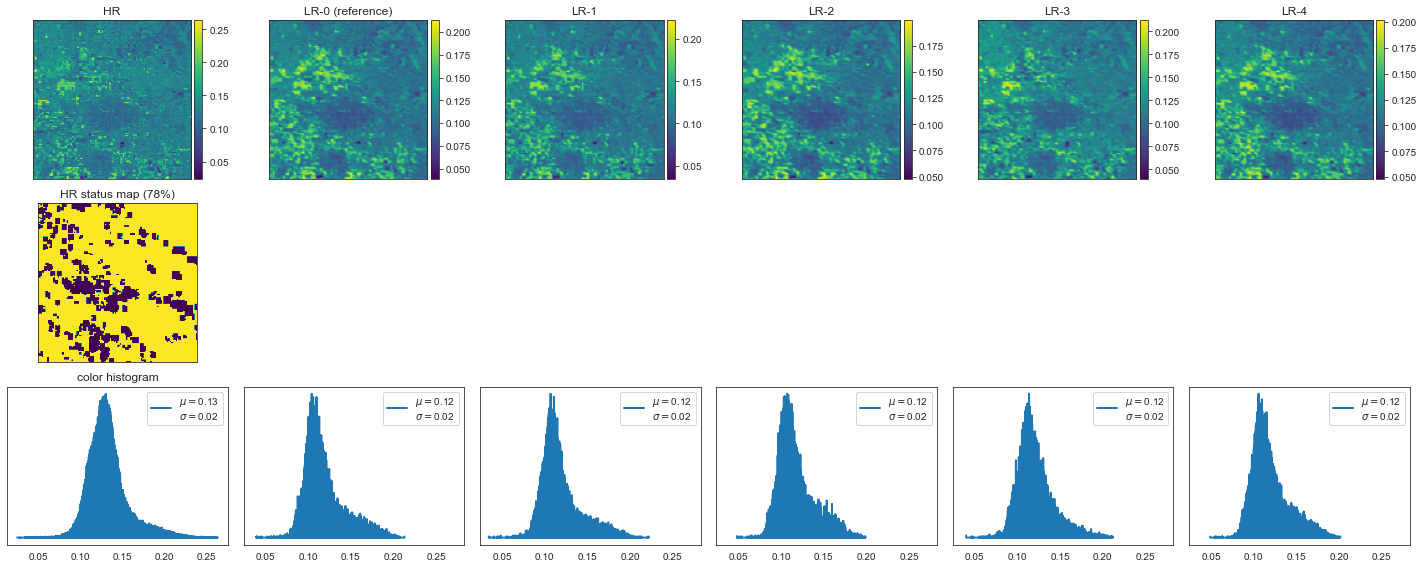

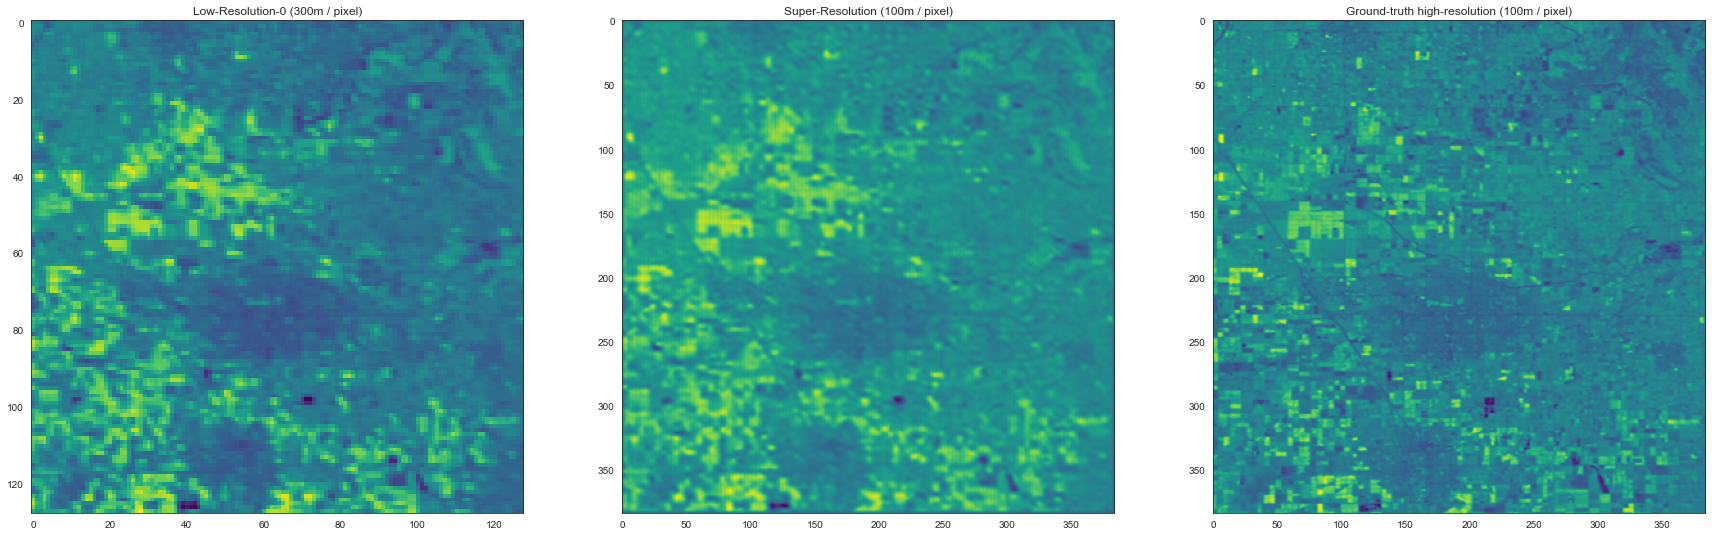

In [73]:
imset = val_dataset['imgset0644']
sr, scPSNR = model(imset)

imsetshow(imset, k=5, figsize=(20,8), resample=False, show_histogram=True, show_map=True)

plt.figure(figsize=(30, 10))
plt.subplot(131);  plt.imshow(imset['lr'][0]);  plt.title('Low-Resolution-0 (300m / pixel)');
plt.subplot(132);  plt.imshow(sr);  plt.title('Super-Resolution (100m / pixel)');
plt.subplot(133);  plt.imshow(imset['hr']);  plt.title('Ground-truth high-resolution (100m / pixel)');

## 1.6 Generate submission file

In [60]:
model.generate_submission_file(imset_dataset=test_dataset, out='../submission')

generating solutions: 

  0%|          | 0/290 [00:00<?, ?it/s]

**************************************************************************************************************************************************************************************************************************************************************************************************
archiving: 
**************************************************************************************************************************************************************************************************************************************************************************************************
done. The submission-file is found at ../submission/submission.zip. Bye!


In [69]:
val_dataset[54]

      name : imgset0748
      name : str (imgset0748)
        lr : torch.Size([19, 128, 128]) Tensor (torch.float32)
        hr : torch.Size([384, 384]) Tensor (torch.float32)
    hr_map : torch.Size([384, 384]) Tensor (torch.float32)
clearances : (19,) ndarray (uint32)

In [57]:
print(results.shape)

(1450, 7)


In [61]:
results.to_csv("results.csv",index= False)